<a href="https://colab.research.google.com/github/McGirk/laguardia-classwork/blob/main/project2_Classification_Dirk_Exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Genre Classification -- Experiment 2

This project will guide you through the process of building a music genre classifier. You’ll start by selecting specific genres to work with, then examine correlations among different musical features. Using these correlations, you'll identify any redundant features that could be removed to improve model performance and simplify the dataset.

After preparing your data, you’ll train and evaluate three different classification models: Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest. By the end of this project, you’ll compare these models to see which performs best in classifying music genres.

Let’s get started and see how well machine learning can predict the genre of a song based on its characteristics!

## Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load and Explore Dataset
It’s essential to load and explore your dataset to understand its structure, identify any missing or inconsistent values, and get a sense of the types of features available. This initial exploration helps you make informed decisions about data cleaning, feature selection, and preprocessing steps.

In [2]:
# Load the dataset
df = pd.read_csv('/content/Spotify-Tracks-dataset.csv')

# Display initial dataset information
print("First 5 rows of the dataset:")
print(df.head(5))
print("\nInitial Data Overview:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

First 5 rows of the dataset:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          

## Select Genres

For this project, you’ll conduct three classification experiments. One experiment should be binary (classifying between two genres), while the other two will be multiclass (classifying among multiple genres).

Choose Your Genres
Below are some genre options available in the dataset:

`['rock', 'rap', 'jazz', 'latin', 'country', 'pop', 'classical', 'electronic', 'acoustic', 'r-and-b']`

Feel free to explore the dataset if you'd like to use other genres, this dataset has over 100 genres available!

#Instructions
**Binary Experiment:** Choose two genres that you want to classify between (e.g., Rock vs. Jazz). This experiment will help you understand classification when only two classes are present.

**Multiclass Experiments:** For the other two experiments, choose three or more genres to create multiclass classification problems (e.g., Rock, Pop, and Classical). These experiments will show how classification models perform with more categories.



In [3]:
# what are the genres I'm going to be choosing from?
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [4]:
# Example: selected_genres = ['rock', 'rap', 'jazz', 'latin', 'country', 'pop']
# EXPERIMENT 2 (multiclass experiment): I'm adding classical & new-age to disco & instrustrial
selected_genres = ['classical', 'industrial','disco','new-age']

# Filter for the selected genres
df = df[df['track_genre'].isin(selected_genres)]

# Limit the dataset to a sample of 100 tracks per selected genre
df = df.groupby('track_genre').apply(lambda x: x.sample(100, random_state=42)).reset_index(drop=True)

<ipython-input-4-683b469391c6>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('track_genre').apply(lambda x: x.sample(100, random_state=42)).reset_index(drop=True)


## Data Cleaning and Preparation

Preparing data for machine learning involves selecting relevant columns, handling missing values, and encoding categorical variables. First, selecting only the most relevant columns focuses the dataset on essential features, simplifying the model and often improving performance. Next, handling missing values is crucial because incomplete data can disrupt model training; we address this by either removing rows with missing entries or filling them in with appropriate values, such as the mean or median. Finally, encoding categorical variables (like genre) into numerical format allows machine learning algorithms to process non-numeric data. By assigning a unique number to each category using label encoding, we enable the model to interpret these variables accurately, making our dataset ready for analysis.


In [5]:
# Select relevant columns
df = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
         'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'explicit', 'track_genre']]

# Drop any rows with missing values -- We could see from running info() before that
# there's very few lines with missing values
df.dropna(inplace=True)

# Convert 'track_genre' to numerical values (Label Encoding)
label_encoder = LabelEncoder()
df['track_genre'] = label_encoder.fit_transform(df['track_genre'])

# Convert 'explicit' to binary 1/0
df['explicit'] = df['explicit'].astype(int)

# Show class distribution for genres after filtering and sampling
print("\nSampled Genre Distribution:")
print(df['track_genre'].value_counts())


Sampled Genre Distribution:
track_genre
0    100
1    100
2    100
3    100
Name: count, dtype: int64


<ipython-input-5-2ead0a12211f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-5-2ead0a12211f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['track_genre'] = label_encoder.fit_transform(df['track_genre'])
<ipython-input-5-2ead0a12211f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

## Correlation Analysis

The heatmap above shows correlations between features in the dataset. High correlation values (close to 1 or -1) indicate features that likely carry similar information. Removing one of these correlated features can reduce the dataset’s dimensionality, making the model simpler and potentially improving performance.



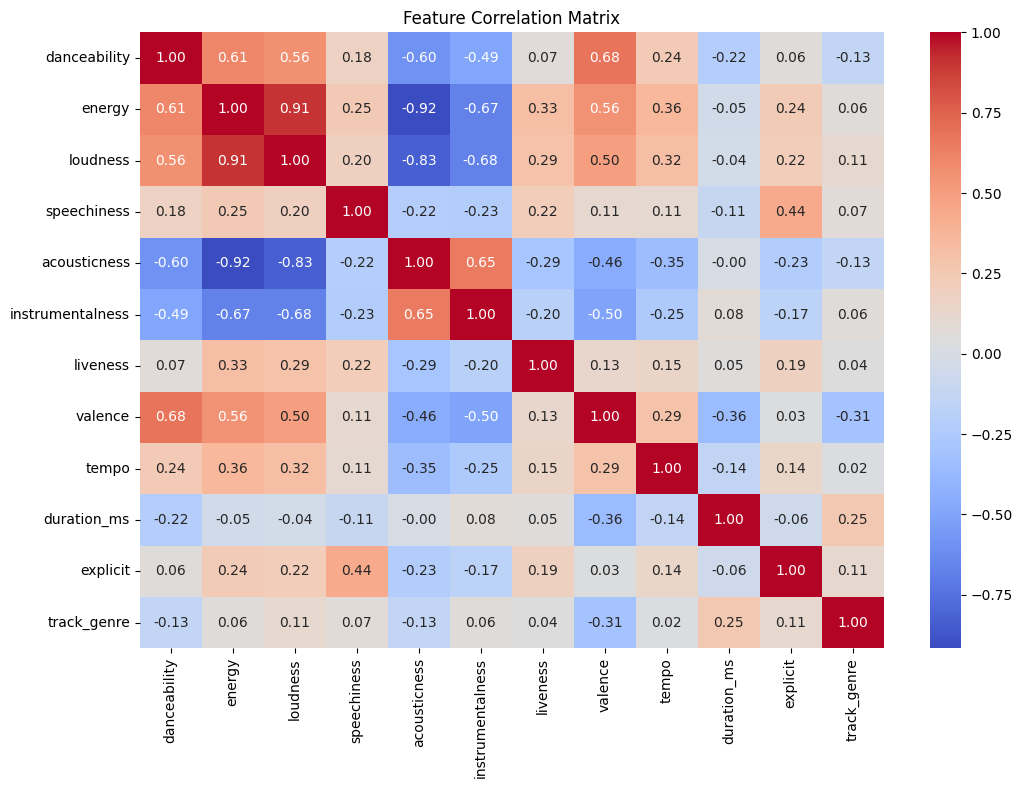

In [6]:

# Heatmap Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Shows us how each of the features correlate to each other. Since we're doing
# the multiclassification remove one feature experiment, we'll identify
# one that is highly correlated to remove.


In [10]:
print(corr_matrix[['energy','loudness','acousticness']])

selected_features = ['energy','loudness', 'acousticness']

# Compute a correlation matrix for finding mean correlation overal
correlation_matrix = df.corr()

# Compute the average absolute correlation for each selected feature with other features
average_absolute_correlations = {}
for feature in selected_features:
    # Get correlations for the current feature, excluding itself
    correlations = correlation_matrix[feature].drop(feature)
    # Compute the average of absolute values
    average_absolute_correlations[feature] = correlations.abs().mean()

# Print the results
for feature, avg_abs_corr in average_absolute_correlations.items():
    print(f"\nAverage absolute correlation for {feature}: {avg_abs_corr}")

                    energy  loudness  acousticness
danceability      0.609911  0.560761     -0.600544
energy            1.000000  0.907661     -0.916256
loudness          0.907661  1.000000     -0.833472
speechiness       0.246324  0.197198     -0.216898
acousticness     -0.916256 -0.833472      1.000000
instrumentalness -0.671183 -0.676669      0.654959
liveness          0.326256  0.289874     -0.292659
valence           0.557748  0.495932     -0.456054
tempo             0.357053  0.318865     -0.350837
duration_ms      -0.045490 -0.035585     -0.004237
explicit          0.235414  0.219265     -0.228145
track_genre       0.061701  0.110662     -0.131179

Average absolute correlation for energy: 0.4486360949785178

Average absolute correlation for loudness: 0.4223585250499091

Average absolute correlation for acousticness: 0.42593076087425424


## Feature Selection Experiments


**Experiment 2: Remove one highly correlated feature**
Identify a pair of features with a correlation around |0.7| or higher, then remove one and re-train your models. Note any differences compared to the baseline.



These experiments will help you understand the impact of correlated features on model performance.

In [11]:
# Example: remove_features = ['danceability', 'liveness', 'speechiness', 'instrumentalness', 'duration_ms']
# For experiment 2, we see that loudness and energy are very highly
# positively correlated at 0.91 and energy and acousticness are very highly
# negatively correlated at -0.92
# 'energy' is the feature that seems to be the most overall correlated, so
# that's the one we'll remove for experiment 2

remove_features = ['energy']

# Drop the selected features
df.drop(columns=remove_features, inplace=True)

## Prepare Data for Modeling

Split the data into training and testing sets and standardize the features.

In [12]:
# Feature and target selection -- this groups our independent features into X
# and our dependent feature into y
X = df.drop(columns=['track_genre'])
y = df['track_genre']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features -- since our comparison will include a KNN model, we
# want to normalize in case there's feature with an outsized distance magnitude
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and Evaluation

Train and evaluate three models: Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest. Compare their accuracies to find the best-performing model.

In [13]:
# 1. Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM) Results:")
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



Support Vector Machine (SVM) Results:
SVM Accuracy: 0.6916666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.46      0.57        37
           1       0.70      0.76      0.73        25
           2       0.84      0.90      0.87        30
           3       0.53      0.71      0.61        28

    accuracy                           0.69       120
   macro avg       0.70      0.71      0.69       120
weighted avg       0.71      0.69      0.69       120

Confusion Matrix:
 [[17  4  0 16]
 [ 2 19  2  2]
 [ 0  3 27  0]
 [ 4  1  3 20]]


In [14]:
# SVM has the best precision, recall, and f1 for genre class 2, and overall
# accuracy of 69%, which could be better!

# 2. K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN) Results:")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Results:
KNN Accuracy: 0.675
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.54      0.61        37
           1       0.62      0.80      0.70        25
           2       0.89      0.80      0.84        30
           3       0.53      0.61      0.57        28

    accuracy                           0.68       120
   macro avg       0.68      0.69      0.68       120
weighted avg       0.69      0.68      0.68       120

Confusion Matrix:
 [[20  5  0 12]
 [ 1 20  2  2]
 [ 0  5 24  1]
 [ 8  2  1 17]]


In [15]:
# KNN still performed the best at classifying genre class 2, but worse accuracy

# 3. Random Forest
print("\nRandom Forest Results:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Random Forest Accuracy: 0.7583333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.57      0.69        37
           1       0.77      0.80      0.78        25
           2       0.93      0.87      0.90        30
           3       0.57      0.86      0.69        28

    accuracy                           0.76       120
   macro avg       0.79      0.77      0.76       120
weighted avg       0.80      0.76      0.76       120

Confusion Matrix:
 [[21  3  1 12]
 [ 0 20  1  4]
 [ 0  2 26  2]
 [ 3  1  0 24]]


## Model Comparison

Compare model accuracies to determine the best model for genre classification.

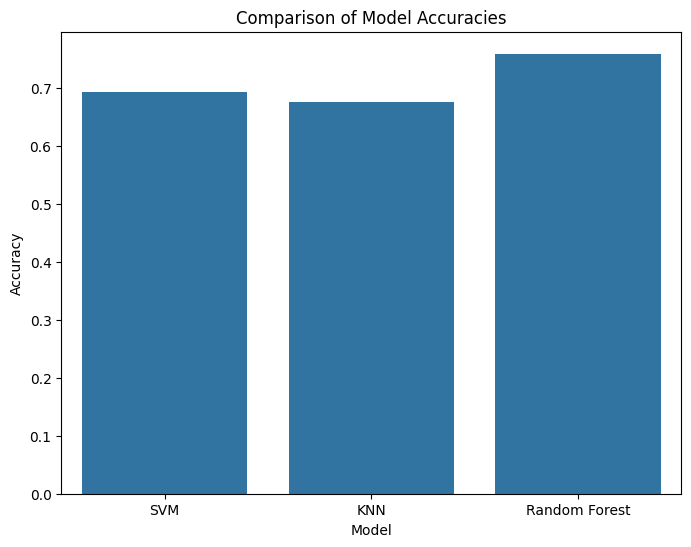

In [16]:
# Random forest finally gets us accuracy above 75% but it seems like
# there should be a way to improve

# Visual Comparison of Model Accuracies for Experiment 2
model_names = ['SVM', 'KNN', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.show()

## Summary

Analyze the model performances and select the model with the highest accuracy for this genre classification task.

--So, we see in this second multi-classification experiment (between 'classical', 'industrial','disco','new-age') removing the highly-correlated 'energy' feature, that the Random Forest model again gives us the best accuracy and f1 scores. Though all models performed the most successfully classifying songs in genre class 2.

--Next, we'll try another multi-classification experiments using 'classical', 'industrial', 'disco', and 'new-age', removing other highly correlated features.